# Title: Mapping in R
### Authors: Richard Johansen
### University of Cincinnati Libraries
### 4/18/2019

### REFERENCES:
Code: https://github.com/RAJohansen/UCL_Workshops/tree/master/Mapping_in_R
Data: www.gapminder.org/data/
Geocomputation in R: https://geocompr.robinlovelace.net/ 

### Section I: Introduction to R

#### Step 1: Load Required Packages

In [1]:
# install.packages(c("tidyverse","gapminder", "maptools","tmap", "marmap", "spData", "spDataLarge", "spDataLarge"))

library(tidyverse)
library(tmap)
library(leaflet)
library(spData)
library(lattice)
library(maptools)
library(gapminder)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`
Loading required package: sp
Checking rgeos availability: TRUE


#### Step 2: Create an R Object (data frame) from the data _gapminder_

In [2]:
df <- gapminder

#### Step 3: Explore the dataframe _df_ 

1. How many variables are in the data?
2. How many observations are there in the data?
3. What type of data is this?
4. Do you have expectations at this point?

In [3]:
str(df)
head(df)
tail(df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


country,continent,year,lifeExp,pop,gdpPercap
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


We can create a table to quickly view the number of observations for each continent

In [6]:
table(df$continent)


  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

Always use the summary tool to explore new data to get a quantitative overview of the data

In [7]:
summary(df)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

#### Step 4: Visualization in R

Using the _plot_ to visualize life expectancy by country

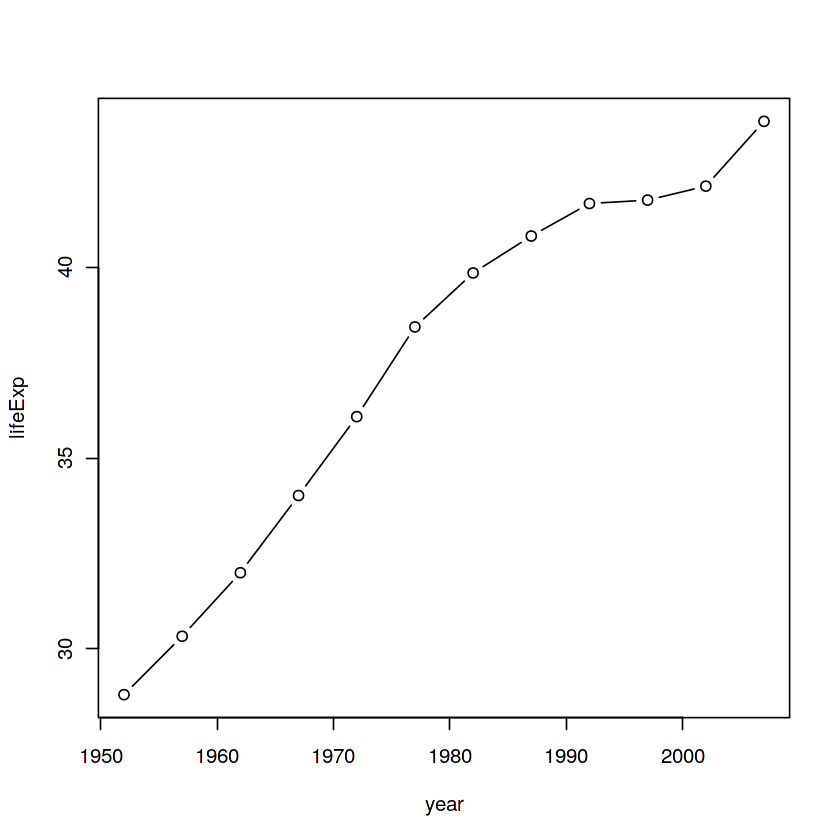

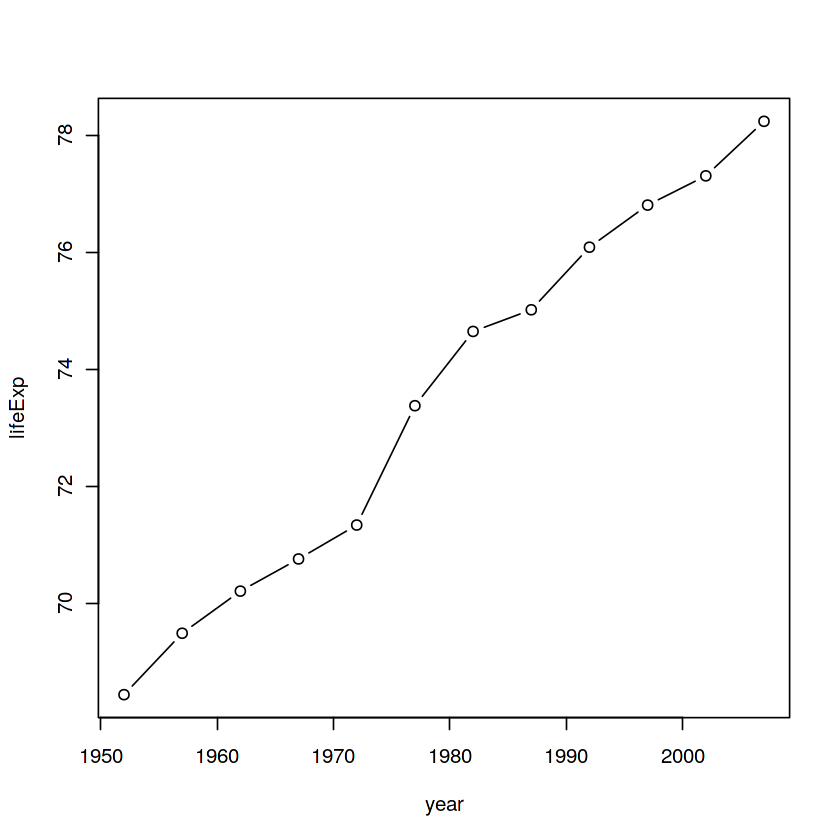

In [8]:
plot(lifeExp ~ year, gapminder, subset = country == "Afghanistan", type = "b")
plot(lifeExp ~ year, gapminder, subset = country == "United States", type = "b")

We can add a second variable to plot life expectancy and GDP

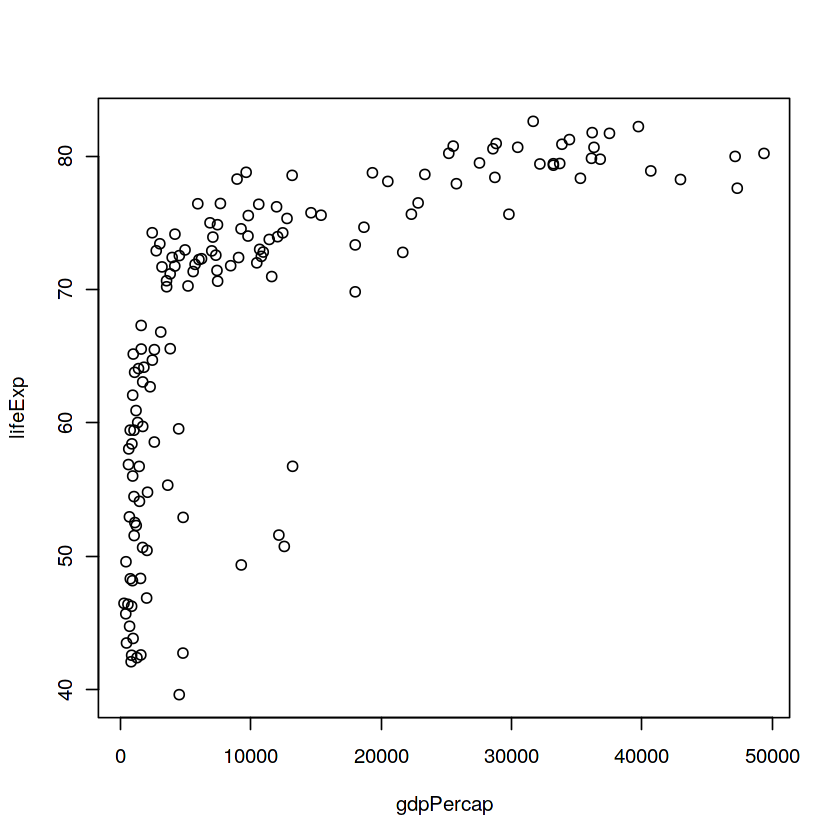

In [9]:
plot(lifeExp ~ gdpPercap, gapminder, subset = year == 2007)

What if we change the X-axis scale to log?

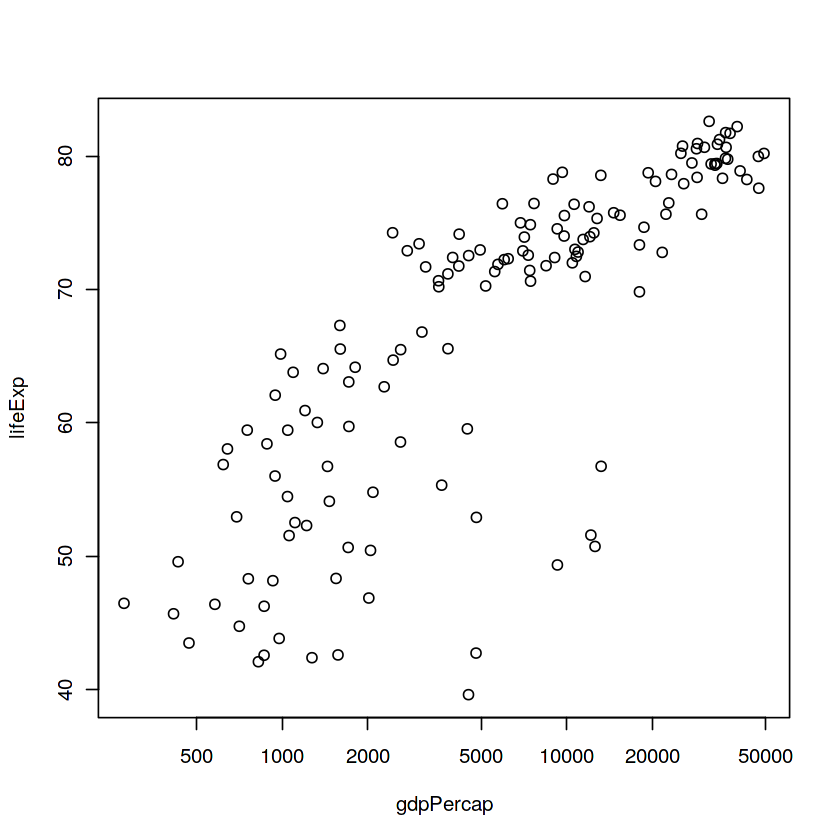

In [10]:
plot(lifeExp ~ gdpPercap, gapminder, subset = year == 2007, log = "x")

__CAUTION:__ Visualizing information in different ways can lead readers to different interpretations

Use boxplots to visualize grouped data

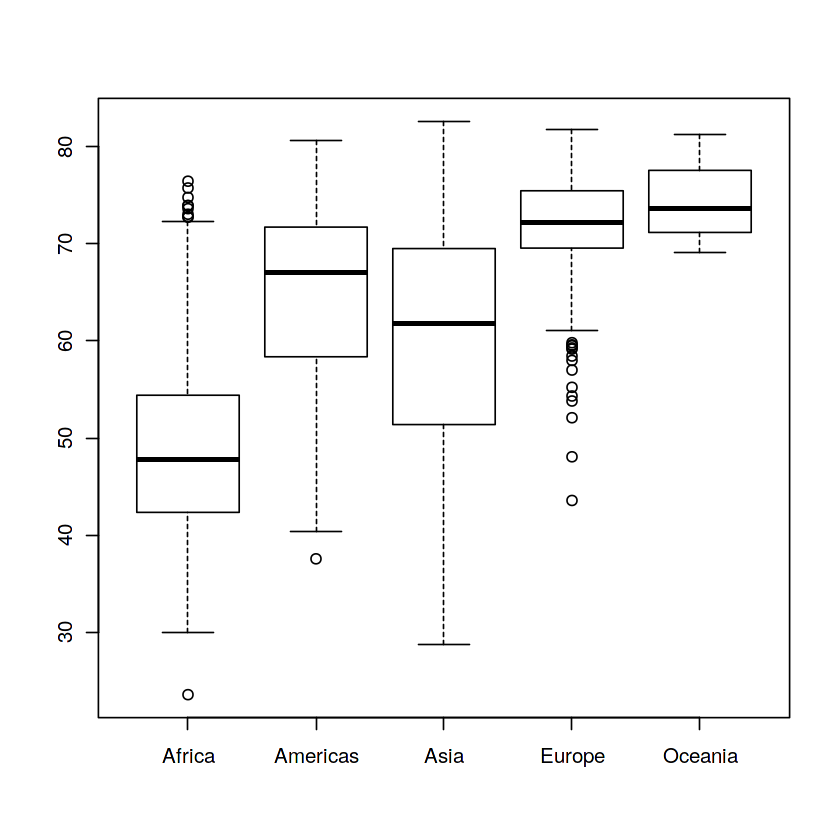

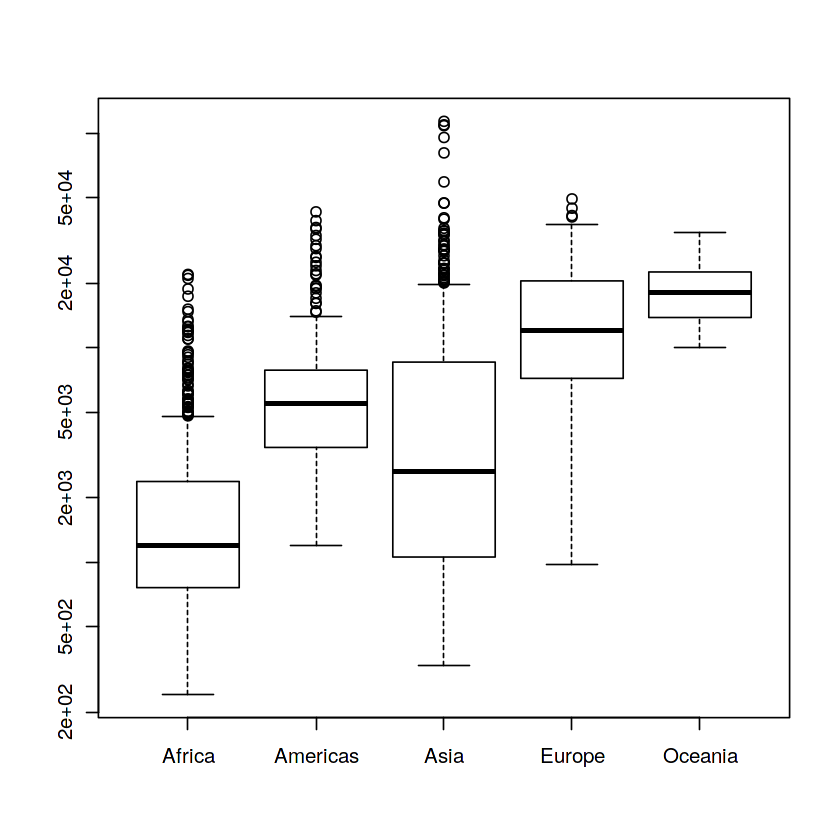

In [11]:
boxplot(df$lifeExp ~ df$continent)
boxplot(df$gdpPercap ~ df$continent, log = "y")

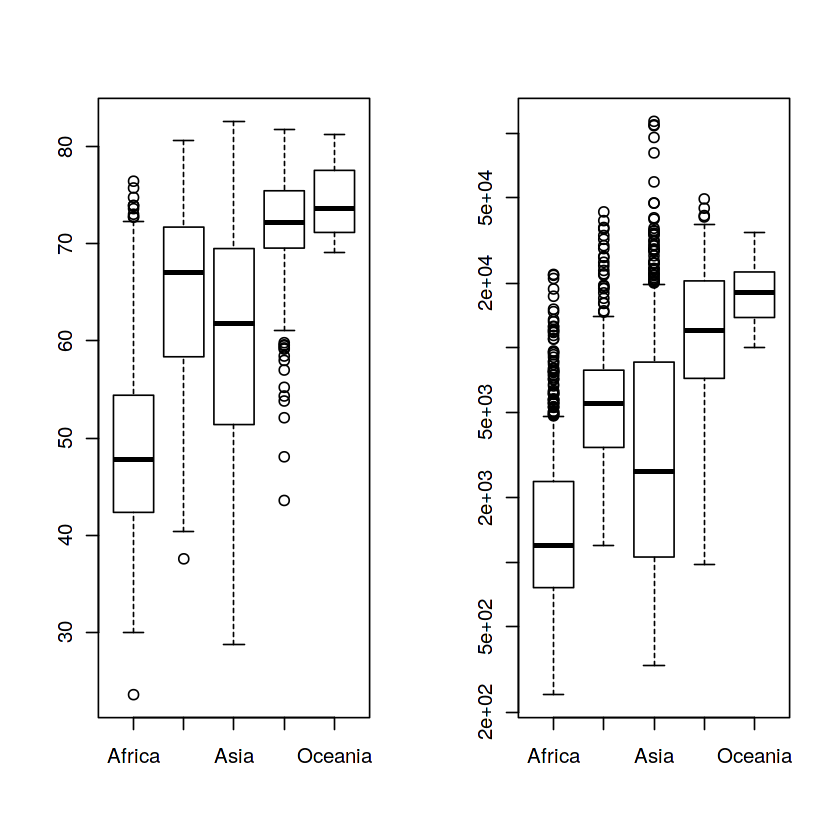

In [12]:
par(mfrow=c(1,2))
boxplot(df$lifeExp ~ df$continent)
boxplot(df$gdpPercap ~ df$continent, log = "y")

### Section II: Mapping with base plot

Base plotting is a simple less sophicated way to make maps in R

#### Step 1: Load a basemap from the _maptools_ package

In [13]:
data("wrld_simpl")

#### Step 2: Plot the basemap

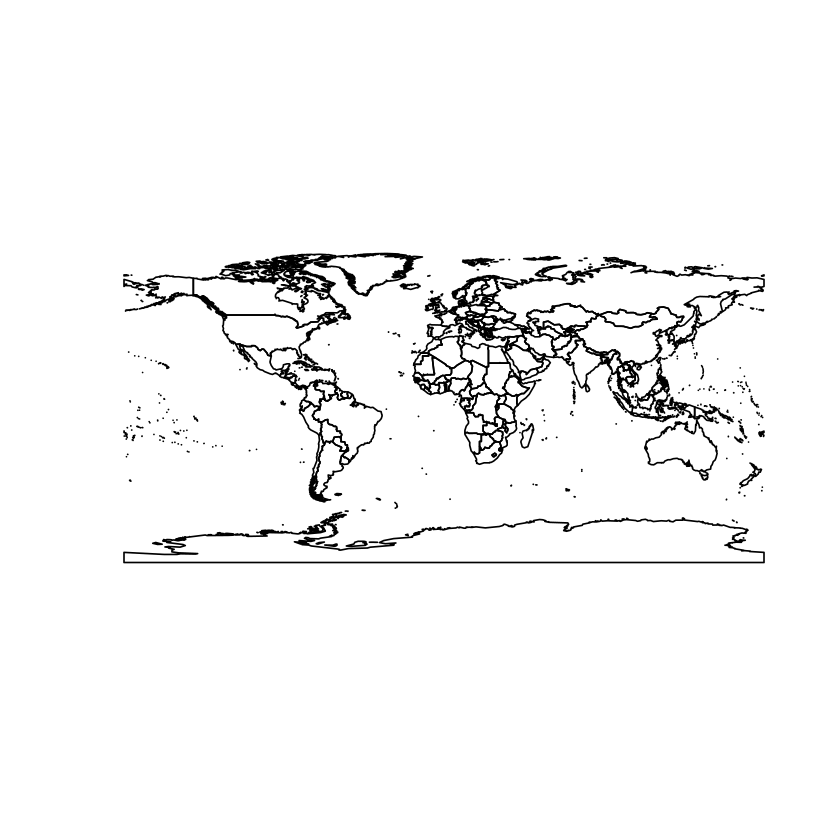

In [14]:
plot(wrld_simpl)

#### Step 3: Define the extent manually using _xlim_ & _ylim_

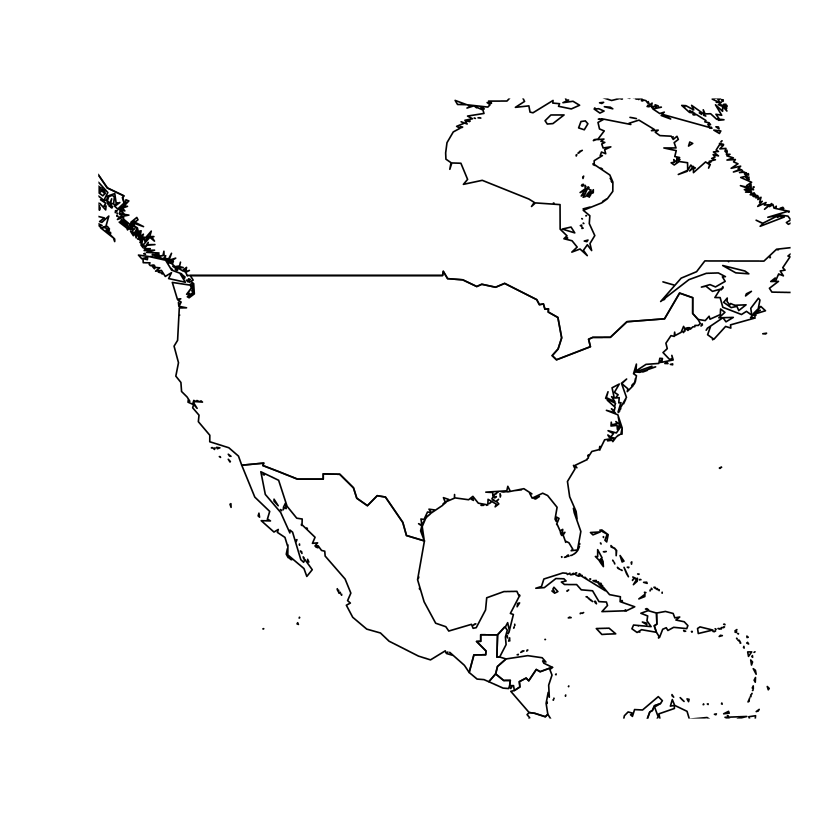

In [15]:
plot(wrld_simpl,
     xlim=c(-130,-60),
     ylim=c(25,50))

#### Step 4: Add colors to countries & background by using the _col_ & _bg_ functions

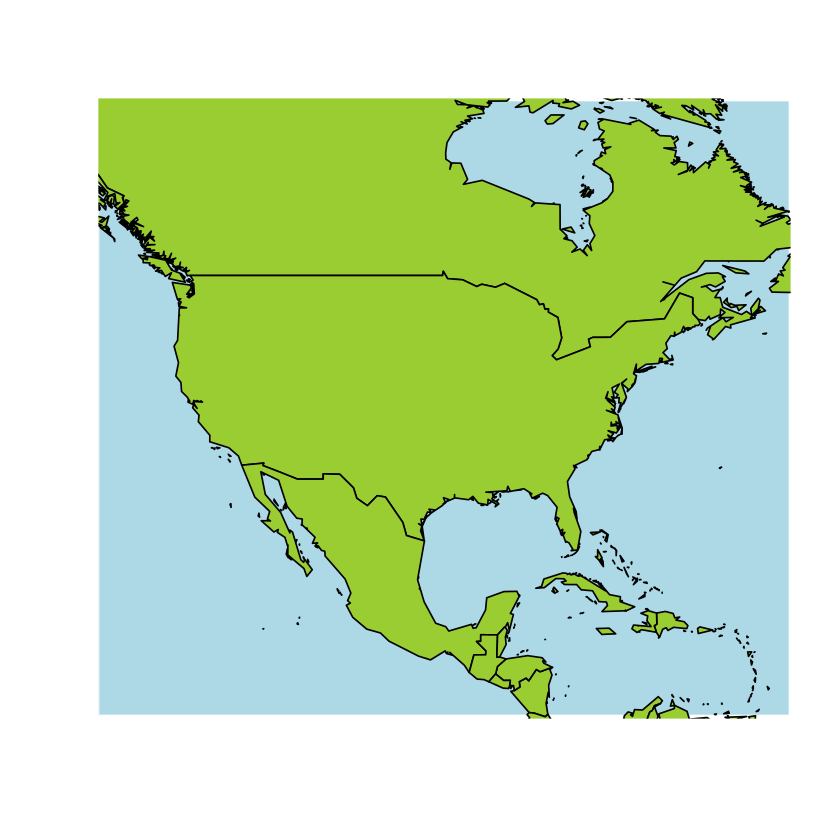

In [16]:
plot(wrld_simpl,
     xlim=c(-130,-60),
     ylim=c(25,50),
     col='olivedrab3', #Countries
     bg='lightblue') #***Background in this case thats the ocean

#### Step 5: Add "UC" to our map by using defining the Lat and Long

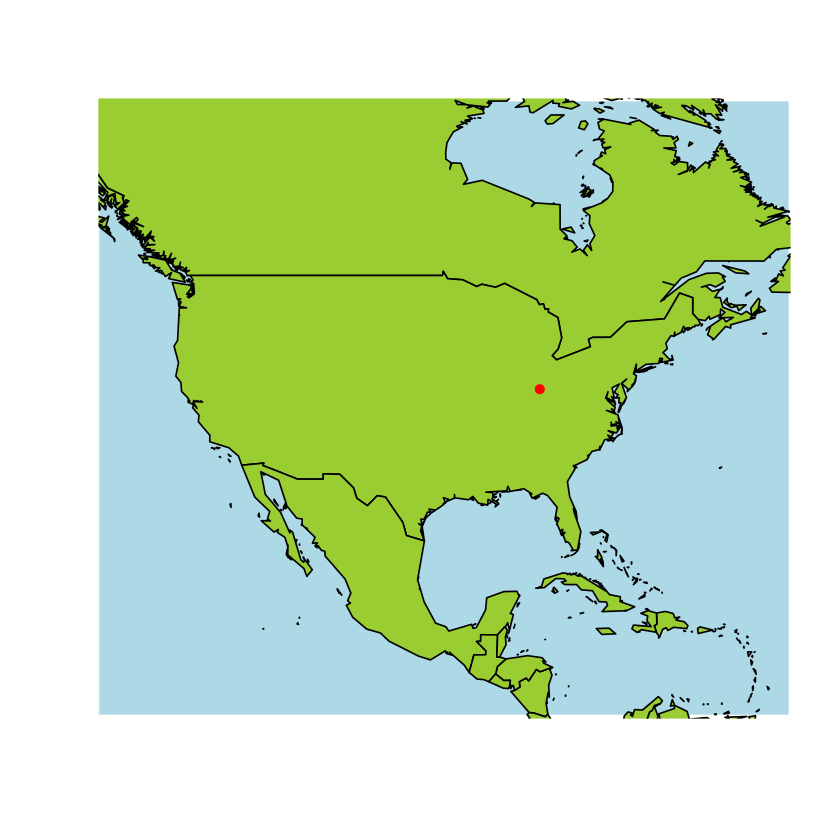

In [17]:
plot(wrld_simpl,
     xlim=c(-130,-60),
     ylim=c(25,50),
     col='olivedrab3', #Countries
     bg='lightblue') #***Background in this case thats the ocean

coords <- matrix(c(-84.518986, 39.132979),ncol=2)
coords <- coordinates(coords)
spoints <- SpatialPoints(coords)
df <- data.frame(location=c("UC"))
spointsdf <- SpatialPointsDataFrame(spoints,df)
plot(spointsdf,add=T,col=c('red'),pch=16) # add = T; adds this to existing plot

### Section III: Mapping with tmap

#### Step 1: Load the _world_ basemap

In [18]:
world <- world

Explore the variables of the _world_ data

In [21]:
names(world)

[1] "iso_a2"    "name_long" "continent" "region_un" "subregion" "type"     
 [7] "area_km2"  "pop"       "lifeExp"   "gdpPercap" "geom"

#### Step 2: Plot the _world_ data using  tmap


The tmap package uses a "layer cake" style programming to build visualizations. <br>
We start with a filled shape and then add elements to increase complexity

Linking to GEOS 3.5.1, GDAL 2.1.2, PROJ 4.9.3


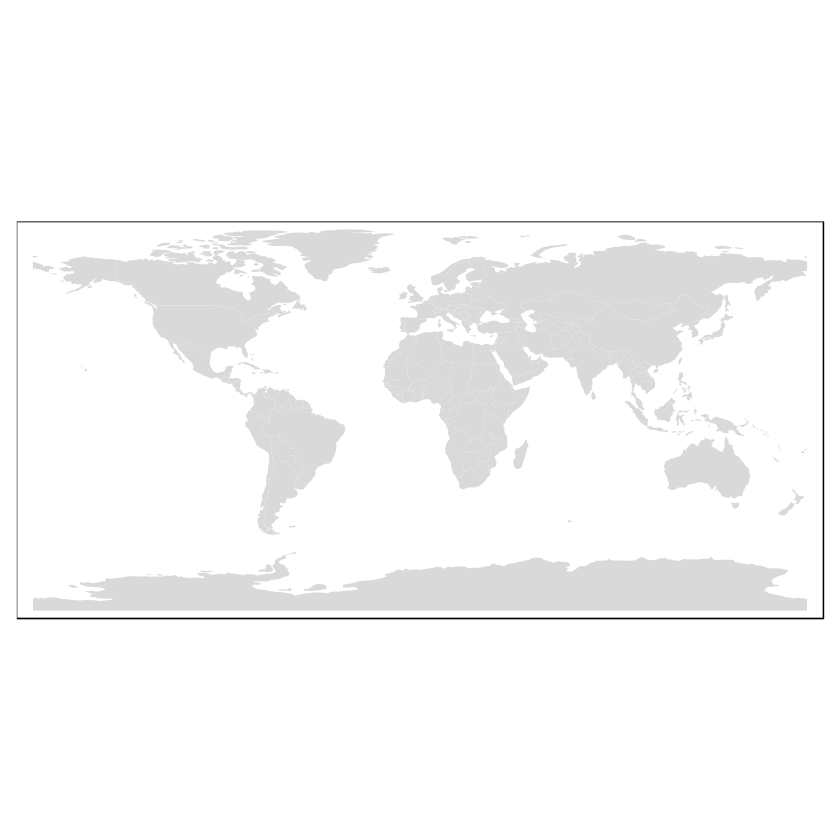

In [24]:
tm_shape(world) +
  tm_fill()

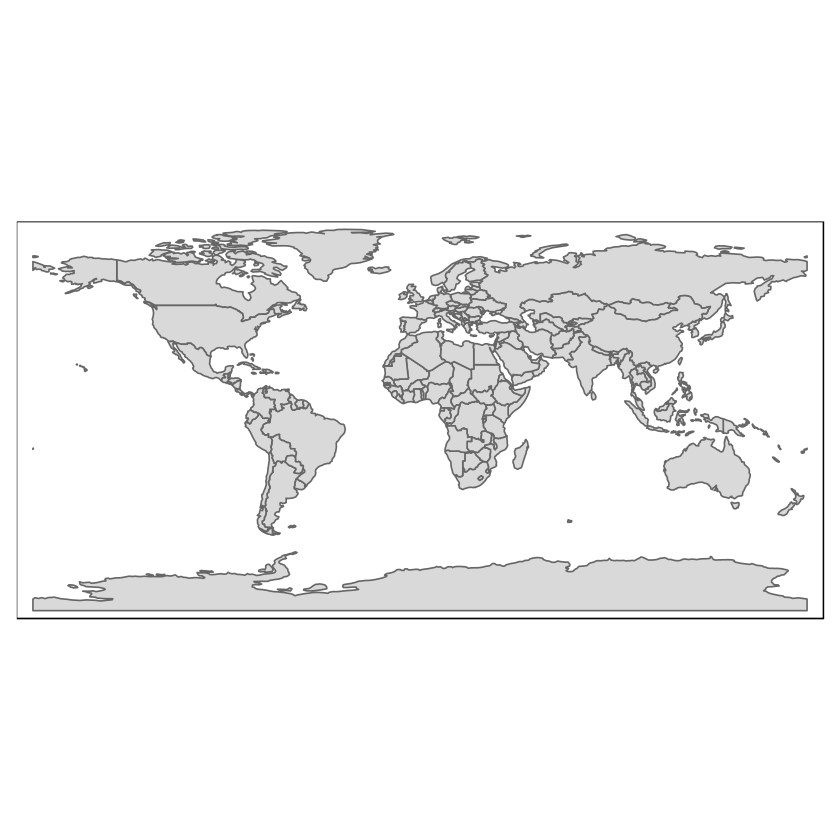

In [25]:
tm_shape(world) +
  tm_fill() + 
  tm_borders() 

#### Step 3: Create a thematic map using population density
Default style is pretty (rounded numbers)

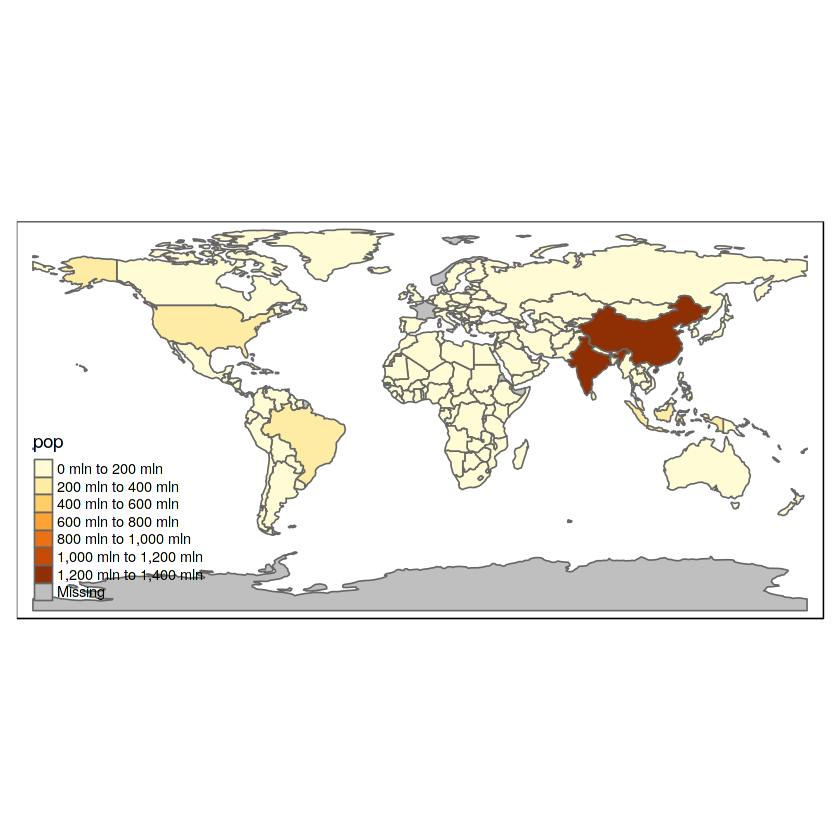

In [26]:
tm_shape(world) +
  tm_fill(col = "pop") + 
  tm_borders() 

#### Step 4: Explore thematic styles

1. define number of groups by using _n = _
2. Manually define breaks using _breaks = _
3. Or you can define a style such as _jenks_, _cont_, or _cat_

In [ ]:
tm_shape(world) +
  tm_fill(col = "pop", n =  5) + 
  tm_borders() 

In [ ]:
breaks = c(0,10^6, 10^7, 10^8, 10^9, 10^10)
tm_shape(world) +
  tm_fill(col = "pop", breaks = breaks) + 
  tm_borders() 

In [ ]:
tm_shape(world) +
  tm_fill(col = "pop", style = "jenks") + 
  tm_borders() 

In [ ]:
tm_shape(world) +
  tm_fill(col = "pop", style = "cont") + 
  tm_borders() 

In [ ]:
tm_shape(world) +
  tm_fill(col = "continent", style = "cat") + 
  tm_borders()

#### Step 5: Explore palattes

In [29]:
#tmaptools::palette_explorer()
?palette

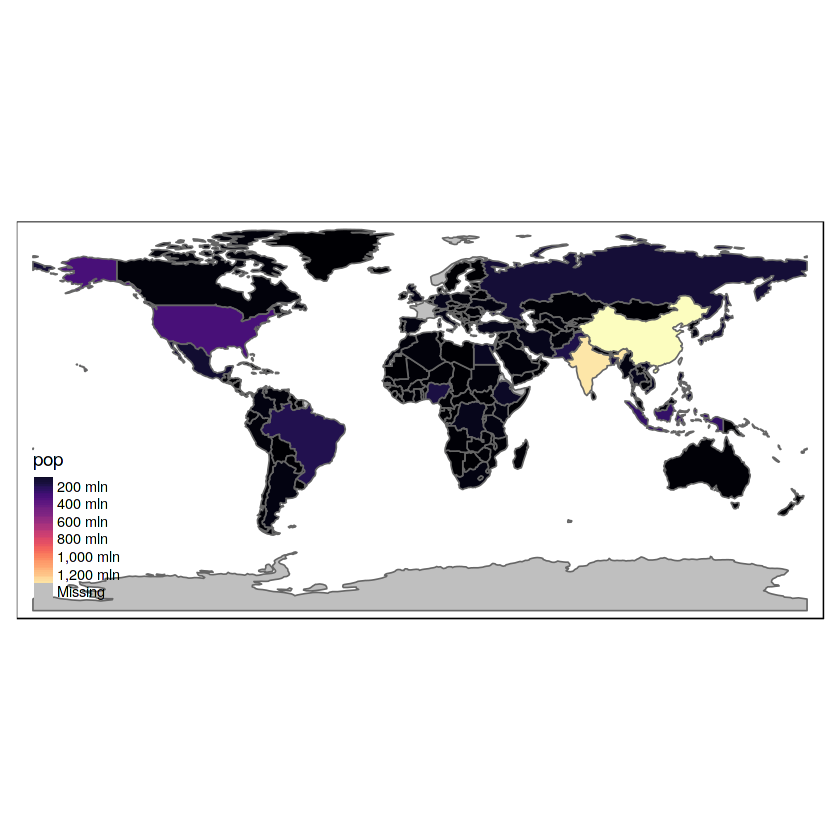

In [28]:
tm_shape(world) +
  tm_fill(col = "pop", style = "cont", palette = "magma") + 
  tm_borders() 

#### Step 6: Add cartographic elements

Scale bar set for latitude km and will be different at the top and bottom of the map.


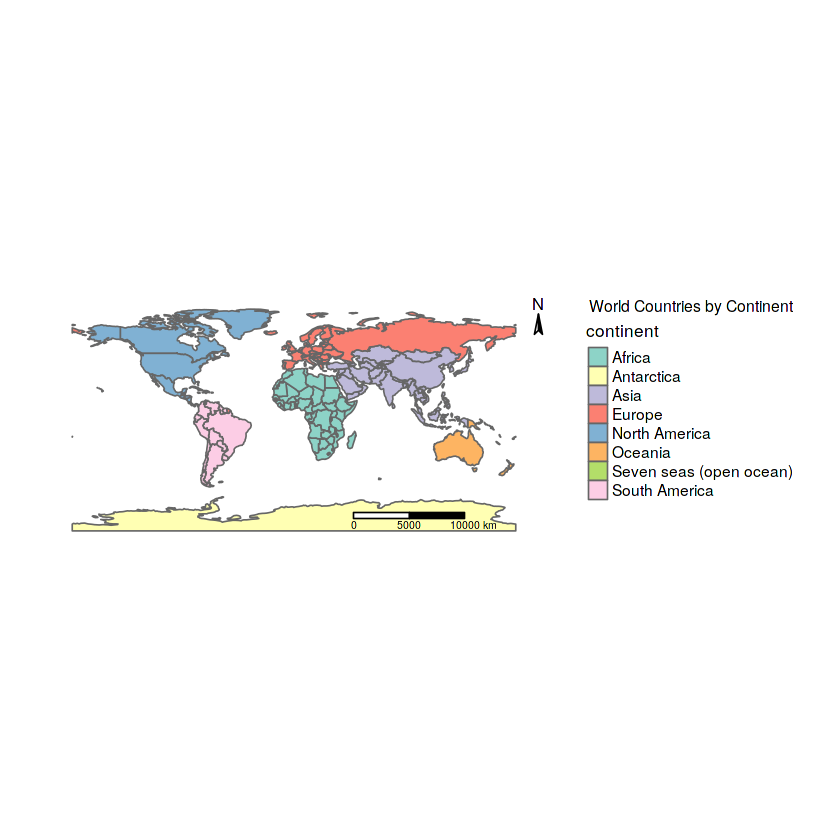

In [30]:
tm_shape(world) +
  tm_fill(col = "continent", style = "cat") + 
  tm_borders() +
  tm_layout(title = "World Countries by Continent",
            title.size = 2,
            frame = FALSE,
            inner.margins = 0.1,
            legend.title.size = 1,
            legend.text.size = 0.75,
            legend.outside = TRUE) +
  tm_compass(type = "arrow", position = c("right", "top"), size = 1) +
  tm_scale_bar(breaks = c(0, 5000, 10000),size = 0.5, position = c(0.6,0.075))


Mapping a globe color coded by continent isn't helpful, so lets use the same technique above to map life expectancy 

Scale bar set for latitude km and will be different at the top and bottom of the map.


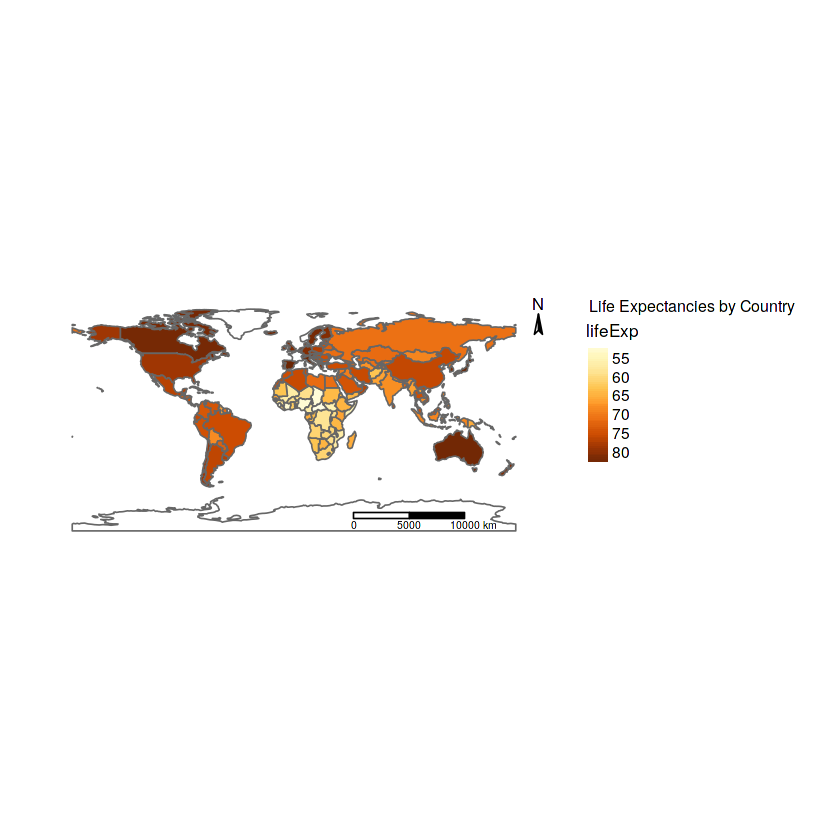

In [31]:
tm_shape(world) +
  tm_fill(col = "lifeExp", style = "cont", colorNA = NULL) + 
  tm_borders() +
  tm_layout(title = "Life Expectancies by Country",
            title.size = 2,
            frame = FALSE,
            inner.margins = 0.1,
            legend.title.size = 1,
            legend.text.size = 0.75,
            legend.outside = TRUE) +
  tm_compass(type = "arrow", position = c("right", "top"), size = 1) +
  tm_scale_bar(breaks = c(0, 5000, 10000),size = 0.5, position = c(0.6,0.075))